In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('bankloan.csv')

# Check first few rows
print(df.head())

# Check info and missing values
print(df.info())
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total

In [2]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [3]:
X = df.drop(columns=['ID', 'ZIP.Code', 'Personal.Loan'])
y = df['Personal.Loan']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.9782857142857143


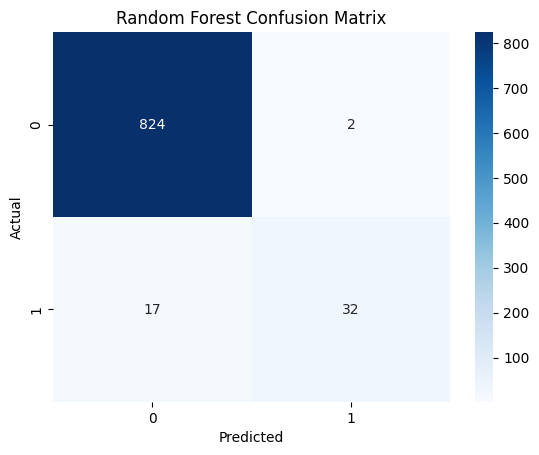

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       826
           1       0.94      0.65      0.77        49

    accuracy                           0.98       875
   macro avg       0.96      0.83      0.88       875
weighted avg       0.98      0.98      0.98       875



In [8]:
y_pred = rf_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Detailed Classification Report
print(classification_report(y_test, y_pred))


In [9]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold CV
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.98285714 0.97485714 0.97371429 0.97942857 0.97597254]
Mean CV score: 0.977365936580582
